In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/merged_2016.csv')

# Drop non-numerical data
X = df.drop(['logerror', 'parcelid', 'transactiondate', 'hashottuborspa',\
                    'propertycountylandusecode', 'propertyzoningdesc',\
                    'taxdelinquencyflag'], axis=1)
X.fillna(X.median(), inplace=True)

y = df['logerror'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("R^2: {}".format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}\n".format(rmse))

reg_cv = LinearRegression()
cv_scores = cross_val_score(reg_cv, X, y, cv=5)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

R^2: 0.004240446754275817
Root Mean Squared Error: 0.161850716781016

Average 5-Fold CV Score: 0.0018770799278122307


## Regularized Regression

Feature Selection: {'alpha': 0.10000000000000001}
Lasso Score: -1.810633117680635e-05


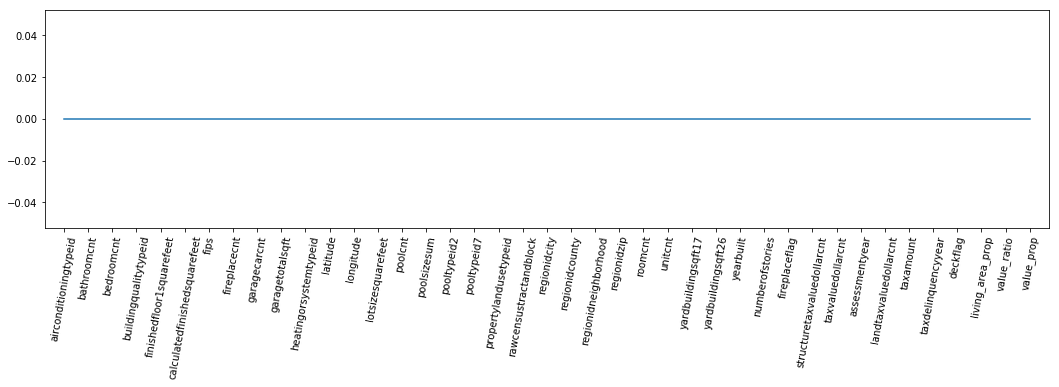

In [18]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha':np.arange(0.1, 1.1, 0.1)}

lasso = Lasso(normalize=True)
lasso_cv = GridSearchCV(lasso, param_grid, cv=5)

lasso_cv.fit(X_train, y_train)

print("Feature Selection: {}".format(lasso_cv.best_params_))
print("Lasso Score: {}".format(lasso_cv.best_score_))

lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_coef = lasso.coef_

plt.figure(figsize=(18, 4))
plt.plot(range(len(X_train.columns)), lasso_coef)
plt.xticks(range(len(X_train.columns)), X_train.columns.values, rotation=80)
plt.margins(0.02)
plt.show()

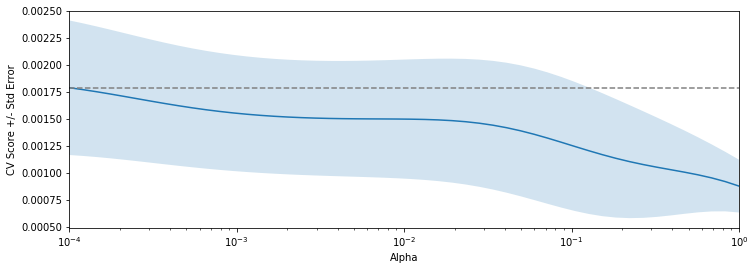

In [27]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1, normalize=True)

alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

for alpha in alpha_space:
    ridge.alpha = alpha
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    ridge_scores.append(np.mean(ridge_cv_scores))
    ridge_scores_std.append(np.std(ridge_cv_scores))
    
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,1,1)
ax.plot(alpha_space, ridge_scores)

std_error = ridge_scores_std / np.sqrt(10)

ax.fill_between(alpha_space, ridge_scores + std_error, ridge_scores - std_error, alpha=0.2)
ax.set_ylabel('CV Score +/- Std Error')
ax.set_xlabel('Alpha')
ax.axhline(np.max(ridge_scores), linestyle='--', color='.5')
ax.set_xlim([alpha_space[0], alpha_space[-1]])
ax.set_xscale('log')
plt.show()